In [15]:
using PowerDynamics: SlackAlgebraic, FourthOrderEq,WindTurbineGenType4, WindTurbineGenType4_RotorControl, PQAlgebraic, PiModelLine, StaticLine, Transformer, PowerGrid, write_powergrid, Json, PowerGridSolution
using OrderedCollections: OrderedDict

# Data Source: Kodsi, S. K. M., & Canizares, C. A. (2003). Modeling and simulation of IEEE 14-bus system with FACTS controllers. University of Waterloo, Canada, Tech. Rep.

buses=OrderedDict(
    "bus1"=> FourthOrderEq(T_d_dash=7.4, D=2, X_d=0.8979, X_q=0.646, Ω=50, X_d_dash=0.2995, T_q_dash=0.1, X_q_dash=0.646, P=2.32, H=5.148, E_f=1),
    "bus2"=> SlackAlgebraic(U=1),
    #"bus3"=> FourthOrderEq(T_d_dash=6.1, D=2, X_d=1.05, X_q=0.98, Ω=50, X_d_dash=0.185, T_q_dash=0.4, X_q_dash=0.36, P=-0.942, H=6.54, E_f= 1),
    "bus3"=> WindTurbineGenType4(ΔP_max=0.1, K_P=0.5, K_PLL=0.05, P=0.8),# 
    "bus4"=> PQAlgebraic(P=-0.478, Q=-0.0),
    "bus5"=> PQAlgebraic(P=-0.076, Q=-0.016),
    "bus6"=> FourthOrderEq(T_d_dash=4.75, D=2, X_d=1.25, X_q=1.22, Ω=50, X_d_dash=0.232, T_q_dash=1.6, X_q_dash=0.715, P=-0.122, H=5.06, E_f= 1),
    "bus7"=> PQAlgebraic(P=-0.0, Q=-0.0),
    "bus8"=> FourthOrderEq(T_d_dash=4.75, D=2, X_d=1.25, X_q=1.22, Ω=50, X_d_dash=0.232, T_q_dash=1.6, X_q_dash=0.715, P=0.0, H=5.06, E_f= 1),
    "bus9"=> PQAlgebraic(P=-0.295, Q=-0.166),
    "bus10"=> PQAlgebraic(P=-0.09, Q=-0.058),
    "bus11"=> PQAlgebraic(P=-0.035, Q=-0.018),
    "bus12"=> PQAlgebraic(P=-0.061, Q=-0.016),
    "bus13"=> PQAlgebraic(P=-0.135, Q=-0.058),
    "bus14"=> PQAlgebraic(P=-0.149, Q=-0.05));

branches=OrderedDict(
    "branch1"=> PiModelLine(from= "bus1", to = "bus2",y=4.999131600798035-1im*15.263086523179553, y_shunt_km=0.0528/2, y_shunt_mk=0.0528/2),
    "branch2"=> PiModelLine(from= "bus1", to = "bus5",y=1.025897454970189-1im*4.234983682334831, y_shunt_km=0.0492/2, y_shunt_mk=0.0492/2),
    "branch3"=> PiModelLine(from= "bus2", to = "bus3",y=1.1350191923073958-1im*4.781863151757718, y_shunt_km=0.0438/2, y_shunt_mk=0.0438/2),
    "branch4"=> PiModelLine(from= "bus2", to = "bus4",y=1.686033150614943-1im*5.115838325872083, y_shunt_km=0.0340/2, y_shunt_mk=0.0340/2),
    "branch5"=> PiModelLine(from= "bus2", to = "bus5",y=1.7011396670944048-1im*5.193927397969713, y_shunt_km=0.0346/2, y_shunt_mk=0.0346/2),
    "branch6"=> PiModelLine(from= "bus3", to = "bus4",y=1.9859757099255606-1im*5.0688169775939205, y_shunt_km=0.0128/2, y_shunt_mk=0.0128/2),
    "branch7"=> StaticLine(from= "bus4", to = "bus5",Y=6.840980661495672-1im*21.578553981691588),
    "branch8"=> Transformer(from= "bus4", to = "bus7", y=0.0-1im*4.781943381790359, t_ratio=0.978),
    "branch9"=> Transformer(from= "bus4", to = "bus9", y=0.0-1im*1.7979790715236075, t_ratio=0.969),
    "branch10"=> Transformer(from= "bus5", to = "bus6", y=0.0-1im*3.967939052456154, t_ratio=0.932),
    "branch11"=> StaticLine(from= "bus6", to = "bus11",Y=1.9550285631772604-1im*4.0940743442404415),
    "branch12"=> StaticLine(from= "bus6", to = "bus12",Y=1.525967440450974-1im*3.1759639650294003),
    "branch13"=> StaticLine(from= "bus6", to = "bus13",Y=3.0989274038379877-1im*6.102755448193116),
    "branch14"=> StaticLine(from= "bus7", to = "bus8",Y=0.0-1im*5.676979846721544),
    "branch15"=> StaticLine(from= "bus7", to = "bus9",Y=0.0-1im*9.09008271975275),
    "branch16"=> StaticLine(from= "bus9", to = "bus10",Y=3.902049552447428-1im*10.365394127060915),
    "branch17"=> StaticLine(from= "bus9", to = "bus14",Y=1.4240054870199312-1im*3.0290504569306034),
    "branch18"=> StaticLine(from= "bus10", to = "bus11",Y=1.8808847537003996-1im*4.402943749460521),
    "branch19"=> StaticLine(from= "bus12", to = "bus13",Y=2.4890245868219187-1im*2.251974626172212),
    "branch20"=> StaticLine(from= "bus13", to = "bus14",Y=1.1369941578063267-1im*2.314963475105352));


powergrid = PowerGrid(buses, branches)
write_powergrid(powergrid, joinpath(@__DIR__,"grid.json"), Json)

In [23]:
using Plots


# Assuming WindTurbineType is the type name for wind turbines
# and they have an attribute that can be plotted similarly

# Helper function to convert angular speed deviation to frequency
function angular_speed_to_frequency(ω, nominal_frequency=60)
    return nominal_frequency + ω / (2 * π)
end

# Modified plotting function to include wind turbines
function plot_frequency(sol, powergrid, timespan, tres=10000)
    start_time, end_time = timespan  # Unpack the timespan tuple into start and end time
    
    generator_indices = findall(bus -> typeof(bus) == FourthOrderEq, powergrid.nodes)
    wind_turbine_indices = findall(bus -> typeof(bus) == WindTurbineGenType4, powergrid.nodes)  # Replace WindTurbineType with the actual type
    
    # Combine the indices and types
    all_indices = [(index, :generator) for index in generator_indices] 
    append!(all_indices, [(index, :turbine) for index in wind_turbine_indices])
    
    labels = []
    for (index, type) in all_indices
        if type == :generator
            push!(labels, "$(index)")
        else
            push!(labels, "Wind Turbine - $(index)")
        end
    end

    # Get the time vector with the desired resolution
    time_vector = LinRange(start_time, end_time, tres)

    # Initialize an empty plot
    pl = plot()

    # Plot each device's frequency or equivalent
    for (i, (dev_index, dev_type)) in enumerate(all_indices)
        if dev_type == :generator
            # Get angular speed deviation for generators
            ω = sol(time_vector, dev_index, :ω)
            # Convert to frequency
            frequency = angular_speed_to_frequency.(ω)
        elseif dev_type == :turbine
            # For wind turbines, assume there's a similar method to get a relevant metric
            # This is a placeholder and needs to be replaced with actual wind turbine data extraction
            ω = sol(time_vector, dev_index, :ω)
            # Convert to frequency
            frequency = angular_speed_to_frequency.(ω)
        end
        # Plot
        plot!(pl, time_vector, frequency, label=labels[i], linewidth=4)
    end

    # Set labels and limits
    xlabel!(pl, "Time [s]", fontsize=10)  # Adjust fontsize for the x-axis label
    ylabel!(pl, "Frequency [Hz]", fontsize=10)  # Adjust fontsize for the y-axis label
    ylims!(pl, 59.94, 60.04)  # Adjust limits as necessary for your data

    return pl
end


plot_frequency (generic function with 4 methods)

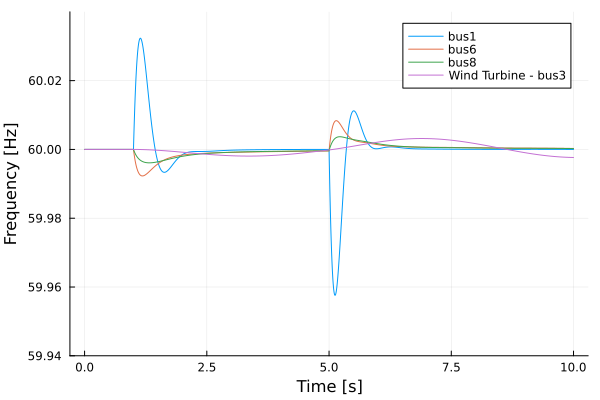

In [20]:
using PowerDynamics: read_powergrid, Json, Inc, find_operationpoint, ChangeInitialConditions, LineFailure, PowerPerturbation, simulate
powergrid = read_powergrid(joinpath(@__DIR__,"grid.json"), Json)
operationpoint = find_operationpoint(powergrid)

end_time = 10
timespan = (0.0, end_time)
#include("plotexample.jl")

# simulating a tripped line between node 1 and 5
fault2 = LineFailure(line_name="branch2", tspan_fault=(1.0,5.0))
solution2 = simulate(fault2, powergrid, operationpoint, timespan)

# # simulating a load drop at node 5
# fault3 = PowerPerturbation(node="bus5", fault_power=0.0, tspan_fault=(1.,1.), var=:P)
# solution3 = simulate(fault3, powergrid, operationpoint, timespan)

plot_frequency(solution2, powergrid, timespan)




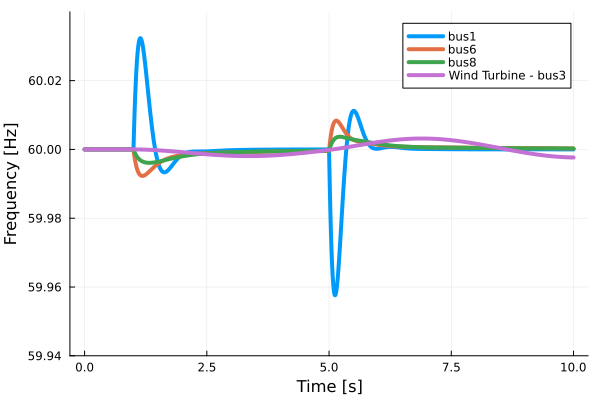

In [24]:
plot_frequency(solution2, powergrid, timespan)

In [31]:
using PowerDynamics: WindTurbineGenType4, construct_vertex, symbolsof
using LinearAlgebra: I, diag
ΔP_max,K_P,K_PLL = rand_positive(3)
P = rand_real()
θ_PLL,dθ_PLL,e_Idθ,de_Idθ,i_d,di_d,ω,dω = rand_real(8)
k_P_invalid,k_PLL_INVALID = rand_negative(2)

UndefVarError: UndefVarError: `rand_positive` not defined

In [20]:
using Pkg
Pkg.activate(".")
using PowerModels
using Ipopt

  Activating new project at `c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks`


In [22]:
network_raw_data = parse_file( "../models/grid_models/this_ieee14.raw")

[info | PowerModels]: The PSS(R)E parser currently supports buses, loads, shunts, generators, branches, transformers, and dc lines


[warn | PowerModels]: Version 32 of PTI format is unsupported, parser may not function correctly.


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in BUS are missing: NVHI, NVLO, EVHI, EVLO


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in LOAD are missing: INTRPT


[warn | PowerModels]: The following fields in GENERATOR are missing: O2, F2, O3, F3, O4, F4, WMOD, WPF


[warn | PowerModels]: The following fields in GENERATOR are missing: O2, F2, O3, F3, O4, F4, WMOD, WPF


[warn | PowerModels]: The following fields in GENERATOR are missing: O2, F2, O3, F3, O4, F4, WMOD, WPF


[warn | PowerModels]: The following fields in GENERATOR are missing: O2, F2, O3, F3, O4, F4, WMOD, WPF


[warn | PowerModels]: The following fields in GENERATOR are missing: O2, F2, O3, F3, O4, F4, WMOD, WPF


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in BRANCH are missing: O2, F2, O3, F3, O4, F4


[warn | PowerModels]: The following fields in TRANSFORMER are missing: O2, F2, O3, F3, O4, F4, VECGRP


[warn | PowerModels]: The following fields in TRANSFORMER are missing: O2, F2, O3, F3, O4, F4, VECGRP


[warn | PowerModels]: The following fields in TRANSFORMER are missing: O2, F2, O3, F3, O4, F4, VECGRP


[warn | PowerModels]: The following fields in TRANSFORMER are missing: O2, F2, O3, F3, O4, F4, VECGRP


[info | PowerModels]: Switched shunt converted to fixed shunt, with default value gs=0.0


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 4 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 1 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 12 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 20 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 2 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 6 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 11 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 13 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 5 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 15 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 16 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 14 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 7 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 8 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 17 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 10 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 19 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 9 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 18 to +/- 60.0 deg.


[warn | PowerModels]: angmin and angmax values are 0, widening these values on branch 3 to +/- 60.0 deg.


[warn | PowerModels]: the voltage setpoint on generator 4 does not match the value at bus 6


[warn | PowerModels]: the voltage setpoint on generator 5 does not match the value at bus 8


[warn | PowerModels]: the voltage setpoint on generator 2 does not match the value at bus 2


[warn | PowerModels]: the voltage setpoint on generator 3 does not match the value at bus 3


Dict{String, Any} with 13 entries:
  "bus"            => Dict{String, Any}("4"=>Dict{String, Any}("zone"=>1, "bus_…
  "source_type"    => "pti"
  "name"           => "this_ieee14"
  "dcline"         => Dict{String, Any}()
  "source_version" => "32"
  "gen"            => Dict{String, Any}("4"=>Dict{String, Any}("pg"=>0.3, "mode…
  "branch"         => Dict{String, Any}("4"=>Dict{String, Any}("br_r"=>0.05811,…
  "storage"        => Dict{String, Any}()
  "switch"         => Dict{String, Any}()
  "baseMVA"        => 100.0
  "per_unit"       => true
  "shunt"          => Dict{String, Any}("1"=>Dict{String, Any}("source_id"=>Any…
  "load"           => Dict{String, Any}("4"=>Dict{String, Any}("source_id"=>Any…

In [23]:
raw_model = instantiate_model(network_raw_data, IVRPowerModel, build_pf_iv)

IVRPowerModel(A JuMP Model
Feasibility problem with:
Variables: 158
`JuMP.AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 121 constraints
`JuMP.QuadExpr`-in-`MathOptInterface.EqualTo{Float64}`: 9 constraints
Nonlinear: 28 constraints
Model mode: AUTOMATIC
CachingOptimizer state: NO_OPTIMIZER
Solver name: No optimizer attached., Dict{String, Any}("bus" => Dict{String, Any}("4" => Dict{String, Any}("zone" => 1, "bus_i" => 4, "bus_type" => 1, "name" => "BUS4        ", "vmax" => 1.1, "source_id" => ["bus", "4"], "area" => 1, "vmin" => 0.9, "index" => 4, "va" => -0.07472103593638124…), "1" => Dict{String, Any}("zone" => 1, "bus_i" => 1, "bus_type" => 3, "name" => "BUS1        ", "vmax" => 1.1, "source_id" => ["bus", "1"], "area" => 1, "vmin" => 0.9, "index" => 1, "va" => 0.0…), "12" => Dict{String, Any}("zone" => 2, "bus_i" => 12, "bus_type" => 1, "name" => "BUS12       ", "vmax" => 1.1, "source_id" => ["bus", "12"], "area" => 2, "vmin" => 0.9, "index" => 12, "va" => -0.1289344531618291…),

In [24]:
pf = optimize_model!(raw_model, optimizer=Ipopt.Optimizer)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      507
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      102

Total number of variables............................:      158
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      158
Total number of inequality co

Dict{String, Any} with 8 entries:
  "solve_time"         => 1.469
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("baseMVA"=>100.0, "branch"=>Dict{St…
  "objective_lb"       => -Inf

In [25]:
vr = Dict(name => data["vr"] for (name, data) in pf["solution"]["bus"])
vi = Dict(name => data["vi"] for (name, data) in pf["solution"]["bus"])


Dict{String, Float64} with 14 entries:
  "4"  => -0.0745613
  "1"  => 5.64237e-37
  "12" => -0.126815
  "2"  => -0.0285378
  "6"  => -0.109627
  "11" => -0.121723
  "13" => -0.131255
  "5"  => -0.0645714
  "14" => -0.164598
  "7"  => -0.0847872
  "8"  => -0.0248343
  "10" => -0.129017
  "9"  => -0.127431
  "3"  => -0.0600971

In [26]:
loss_ac =  Dict(name => data["pt"]+data["pf"] for (name, data) in pf["solution"]["branch"])

Dict{String, Float64} with 20 entries:
  "4"  => 0.00450307
  "1"  => 0.00464362
  "12" => 0.000305223
  "20" => 0.0
  "2"  => 0.00506171
  "6"  => 0.0004313
  "11" => 0.0
  "13" => 0.00237538
  "5"  => 0.0026975
  "15" => 7.11489e-5
  "16" => 0.00126705
  "14" => 0.000100124
  "7"  => 0.000977019
  "8"  => 0.000402705
  "17" => 0.0
  "19" => 0.0
  "10" => 0.00239194
  "9"  => 0.000769867
  "18" => 0.0
  "3"  => 0.00161621

In [27]:
print_summary(pf["solution"])

Metadata
  baseMVA: 100.000
  multiinfrastructure: false
  multinetwork: false
  per_unit: true

Table Counts
  bus: 14
  gen: 5
  branch: 20


Table: bus


             vi,    vr


      1:  0.000, 1.030
      2: -0.029, 1.019
      3: -0.060, 0.999
      4: -0.075, 0.996
      5: -0.065, 1.002
      6: -0.110, 0.993
      7: -0.085, 1.003
      8: -0.025, 1.019
      9: -0.127, 0.994
     10: -0.129, 0.985
     11: -0.122, 0.985
     12: -0.127, 0.978
     13: -0.131, 0.975
     14: -0.165, 0.977


Table: gen
            pg,    qg,    cig,   crg
      1: 0.815, 0.020, -0.019, 0.791
      2: 0.400, 0.150, -0.158, 0.388
      3: 0.400, 0.150, -0.174, 0.390
      4: 0.300, 0.100, -0.132, 0.288
      5: 0.350, 0.100, -0.107, 0.341


Table: branch
             pf,     qf,     pt,     qt,  ci_fr,  ci_to,  cr_fr,  cr_to, csi_fr, csr_fr
      1:  0.504, -0.007, -0.499, -0.035,  0.007,  0.048,  0.489, -0.488, -0.021,  0.489
      2:  0.311,  0.026, -0.306, -0.056, -0.026,  0.076,  0.302, -0.300, -0.051,  0.302
      3:  0.180,  0.037, -0.178, -0.074, -0.041,  0.085,  0.175, -0.173, -0.063,  0.174
      4:  0.282,  0.018, -0.277, -0.039, -0.025,  0.060,  0.276, -0.274, -

In [28]:
# we can also access the admittance matrix
Y = calc_admittance_matrix(network_raw_data)
Y.matrix

14×14 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 54 stored entries:
  6.02503-19.4471im  -4.99913+15.2631im  …           ⋅    
 -4.99913+15.2631im   9.52132-30.2721im              ⋅    
          ⋅          -1.13502+4.78186im              ⋅    
          ⋅          -1.68603+5.11584im              ⋅    
  -1.0259+4.23498im  -1.70114+5.19393im              ⋅    
          ⋅                   ⋅          …           ⋅    
          ⋅                   ⋅                      ⋅    
          ⋅                   ⋅                      ⋅    
          ⋅                   ⋅             -1.42401+3.02905im
          ⋅                   ⋅                      ⋅    
          ⋅                   ⋅          …           ⋅    
          ⋅                   ⋅                      ⋅    
          ⋅                   ⋅             -1.13699+2.31496im
          ⋅                   ⋅                2.561-5.19401im